In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import scipy 
from sklearn.neighbors import NearestNeighbors
import pickle
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.basemap import Basemap
CSI_RSRP_COLUMNS = ['PCell1 -Beam CSI-RSRP','PCell2 -Beam CSI-RSRP','PCell3 -Beam CSI-RSRP',
                    'PCell4 -Beam CSI-RSRP','PCell5 -Beam CSI-RSRP','PCell6 -Beam CSI-RSRP','PCell7 -Beam CSI-RSRP','PCell8 -Beam CSI-RSRP']
CSI_RSRQ_COLUMNS = ['PCell1 -Beam CSI-RSRQ','PCell2 -Beam CSI-RSRQ','PCell3 -Beam CSI-RSRQ',
                    'PCell4 -Beam CSI-RSRQ','PCell5 -Beam CSI-RSRQ','PCell6 -Beam CSI-RSRQ','PCell7 -Beam CSI-RSRQ','PCell8 -Beam CSI-RSRQ']
CSI_SINR_COLUMNS = ['PCell1 -Beam CSI-SINR','PCell2 -Beam CSI-SINR','PCell3 -Beam CSI-SINR',
                    'PCell4 -Beam CSI-SINR','PCell5 -Beam CSI-SINR','PCell6 -Beam CSI-SINR','PCell7 -Beam CSI-SINR','PCell8 -Beam CSI-SINR']
CSI_INDEX_COLUMNS = ['PCell1 -Beam CSI-Index','PCell2 -Beam CSI-Index','PCell3 -Beam CSI-Index',
                    'PCell4 -Beam CSI-Index','PCell5 -Beam CSI-Index','PCell6 -Beam CSI-Index','PCell7 -Beam CSI-Index','PCell8 -Beam CSI-Index']
SS_SINR_COLUMNS = ['SSB Index0 SINR','SSB Index1 SINR','SSB Index2 SINR','SSB Index3 SINR','SSB Index4 SINR','SSB Index5 SINR','SSB Index6 SINR']
SS_RSRP_COLUMNS = ['SSB Index0 RSRP','SSB Index1 RSRP','SSB Index2 RSRP','SSB Index3 RSRP','SSB Index4 RSRP','SSB Index5 RSRP','SSB Index6 RSRP']
CSI_SERVING_COL = ['PCell1 -Beam Serving Beam','PCell2 -Beam Serving Beam','PCell3 -Beam Serving Beam','PCell4 -Beam Serving Beam','PCell5 -Beam Serving Beam',
                   'PCell6 -Beam Serving Beam','PCell7 -Beam Serving Beam','PCell8 -Beam Serving Beam']
CSI_RSRP_IDX_COLUNMS = ['CSI-RSRP-Index0', 'CSI-RSRP-Index1', 'CSI-RSRP-Index2', 'CSI-RSRP-Index3', 'CSI-RSRP-Index4', 'CSI-RSRP-Index5','CSI-RSRP-Index6', 'CSI-RSRP-Index7',
                        'CSI-RSRP-Index8', 'CSI-RSRP-Index9', 'CSI-RSRP-Index10', 'CSI-RSRP-Index11', 'CSI-RSRP-Index12','CSI-RSRP-Index13', 'CSI-RSRP-Index14', 'CSI-RSRP-Index15',
                        'CSI-RSRP-Index16', 'CSI-RSRP-Index17', 'CSI-RSRP-Index18', 'CSI-RSRP-Index19','CSI-RSRP-Index20', 'CSI-RSRP-Index21', 'CSI-RSRP-Index22', 'CSI-RSRP-Index23',
                        'CSI-RSRP-Index24', 'CSI-RSRP-Index25', 'CSI-RSRP-Index26', 'CSI-RSRP-Index27', 'CSI-RSRP-Index28', 'CSI-RSRP-Index29', 'CSI-RSRP-Index30', 'CSI-RSRP-Index31']
CSI_SINR_IDX_COLUNMS = ['CSI-SINR-Index0', 'CSI-SINR-Index1', 'CSI-SINR-Index2', 'CSI-SINR-Index3', 'CSI-SINR-Index4', 'CSI-SINR-Index5','CSI-SINR-Index6', 'CSI-SINR-Index7',
                        'CSI-SINR-Index8', 'CSI-SINR-Index9', 'CSI-SINR-Index10', 'CSI-SINR-Index11', 'CSI-SINR-Index12','CSI-SINR-Index13', 'CSI-SINR-Index14', 'CSI-SINR-Index15',
                        'CSI-SINR-Index16', 'CSI-SINR-Index17', 'CSI-SINR-Index18', 'CSI-SINR-Index19','CSI-SINR-Index20', 'CSI-SINR-Index21', 'CSI-SINR-Index22', 'CSI-SINR-Index23',
                        'CSI-SINR-Index24', 'CSI-SINR-Index25', 'CSI-SINR-Index26', 'CSI-SINR-Index27', 'CSI-SINR-Index28', 'CSI-SINR-Index29', 'CSI-SINR-Index30', 'CSI-SINR-Index31']
PERFORMANCE_COLUMNS = ['NR MAC Throughput DL','NR PRB Num DL/s','NR PRB Num DL/slot','NR RI','NR Avg Rank DL/s',
                       'NR DL Total NACK/s','NR DL Total ACK/s','NR PDSCH Initial BLER','NR PDSCH BLER','NR DL Avg MCS'] 
LOC_COLUMNS = ['Longitude','Latitude']
ALL_COLUMNS = CSI_RSRP_COLUMNS+CSI_RSRQ_COLUMNS+CSI_SINR_COLUMNS+CSI_INDEX_COLUMNS+SS_SINR_COLUMNS+SS_RSRP_COLUMNS+PERFORMANCE_COLUMNS
# 归一化参数
RSRP_MAX = -40
RSRP_MIN = -125
RSRQ_MAX = -4
RSRQ_MIN = -30
SE_MAX = 4000
RI_MAX = 4
MCS_MAX = 27
SINR_MAX = 50
SINR_MIN = -20
RI_COLUMN = ['NR Avg Rank DL/s']
MCS_COLUMN = ['NR DL Avg MCS']
BLER_COLUMN = ['NR PDSCH BLER']
SEVING_IDX = ['Serving idx']

SE_COLUMNS = ['NR MAC Throughput DL','NR PRB Num DL/s']

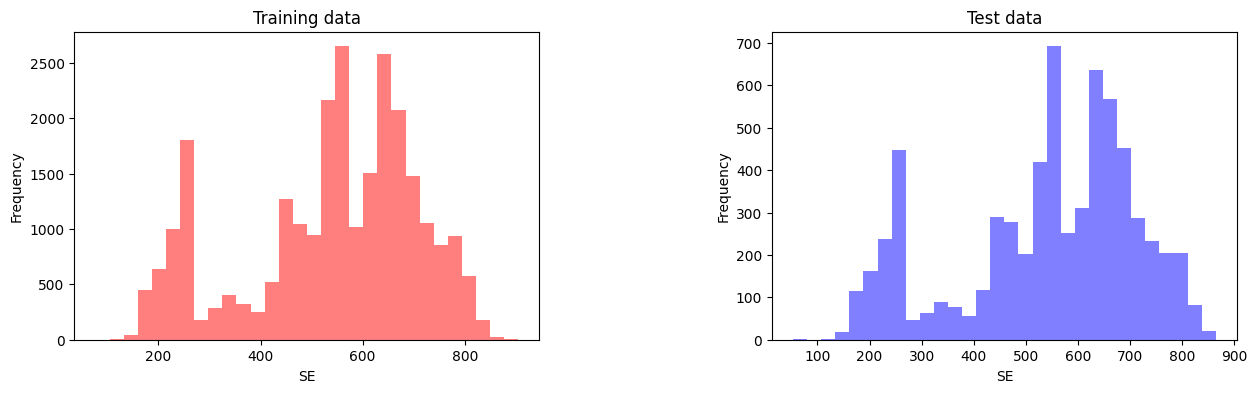

In [2]:
train_features = LOC_COLUMNS+CSI_RSRP_IDX_COLUNMS+SS_RSRP_COLUMNS
with open('dataset_514/0415/data_834_linear_by_idx_loc.pkl','rb') as f:
    data_set_834_415 = pickle.load(f)
with open('dataset_514/0418/data_834_linear_by_idx_loc.pkl','rb') as f:
    data_set_834_418 = pickle.load(f)
with open('dataset_514/0420/data_834_linear_by_idx_loc.pkl','rb') as f:
    data_set_834_420 = pickle.load(f)
with open('dataset_514/0426/data_834_linear_by_idx_loc.pkl','rb') as f:
    data_set_834_426 = pickle.load(f)
with open('dataset_514/0412/data_900_linear_by_idx_loc.pkl','rb') as f:
    data_set_900_412 = pickle.load(f)   
data_set_834 = pd.concat((data_set_834_415,data_set_834_418,data_set_834_420,data_set_834_426))
train,test = train_test_split(data_set_834,test_size=0.2,random_state=1)


train_x = train[train_features]
train_y = train['SE']

test_x = test[train_features]
test_y = test['SE']

# val_x = val[train_features]
# val_y = val['SE']


# 创建三个子图
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# 绘制第一个子图
axs[0].hist(train['NR MAC Throughput DL'], bins=30, alpha=0.5, color='r')
axs[0].set_xlabel('SE')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Training data')

# # # 绘制第二个子图
# # axs[1].hist(val_y, bins=30, alpha=0.5, color='g')
# # axs[1].set_xlabel('SE')
# # axs[1].set_ylabel('Frequency')
# # axs[1].set_title('Validation data')

# 绘制第三个子图
axs[1].hist(test['NR MAC Throughput DL'], bins=30, alpha=0.5, color='b')
axs[1].set_xlabel('SE')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test data')

# 调整子图之间的距离
plt.subplots_adjust(wspace=0.5)

# 显示图像
plt.show()


train_x = train_x[train_features].to_numpy()
test_x = test_x[train_features].to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

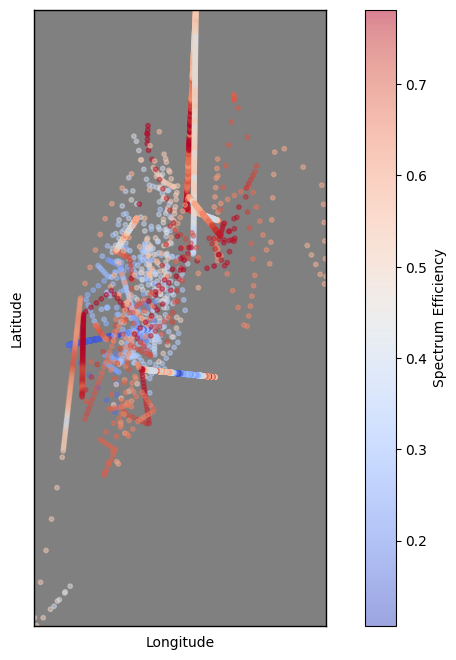

In [17]:
df = data_set_900_412
# 设置绘图范围
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# 创建画布和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制谱效值散点图
m = Basemap(projection='mill', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)
m.drawcoastlines()
m.fillcontinents(color='gray', lake_color='white')
m.drawmapboundary(fill_color='white')
x, y = m(df['Longitude'].values, df['Latitude'].values)
c = df['SE'].values
sc = m.scatter(x, y, s=10, c=c, cmap='coolwarm', alpha=0.5)
plt.colorbar(sc, label='Spectrum Efficiency', ax=ax)

# 添加经纬度标签
ax.set_xlabel('Longitude',rotation = 0)
ax.set_ylabel('Latitude')

# 显示图形
plt.show()

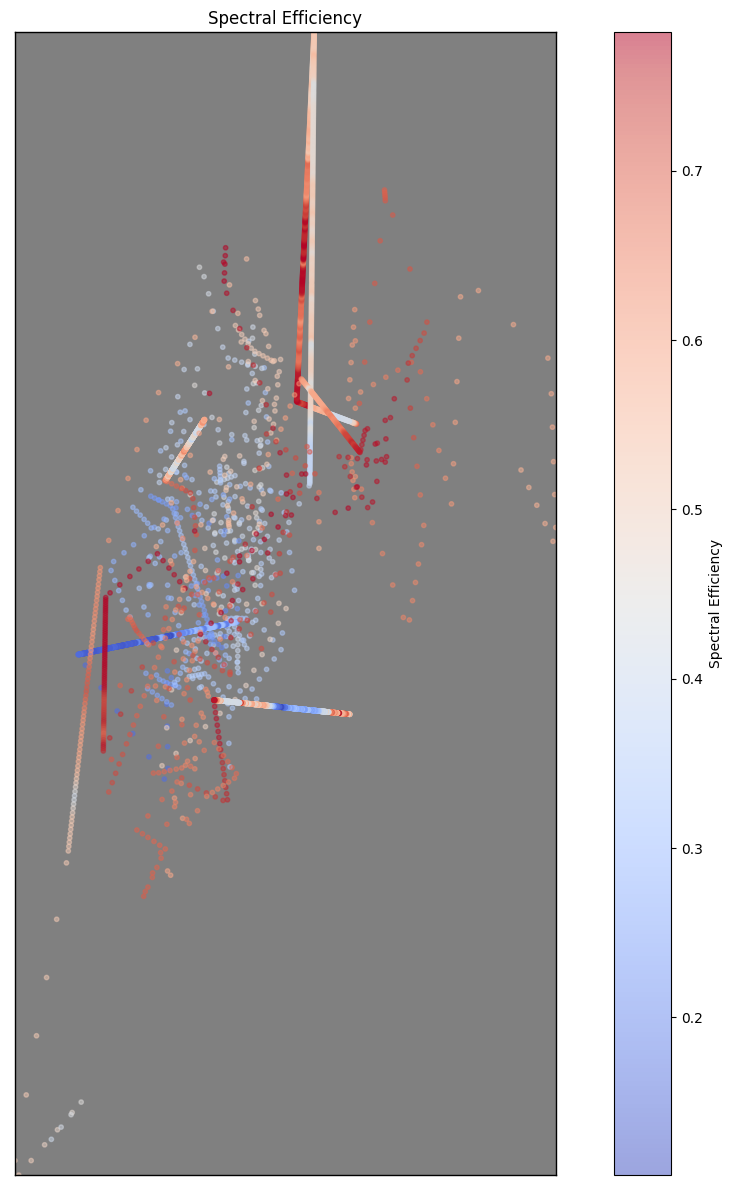

In [5]:
df = data_set_900_412
# 假设数据保存在 dataframe df 中，包括经度(Longitude)和纬度(Latitude)以及谱效值和 RSRP 强度分布两个指标
# 设置绘图范围
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# 创建画布和两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制谱效值散点图
m1 = Basemap(projection='mill', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax1)
m1.drawcoastlines()
m1.fillcontinents(color='gray', lake_color='white')
m1.drawmapboundary(fill_color='white')
x1, y1 = m1(df['Longitude'].values, df['Latitude'].values)
c1 = df['SE'].values
sc1 = m1.scatter(x1, y1, s=10, c=c1, cmap='coolwarm', alpha=0.5)
plt.colorbar(sc1, label='Spectral Efficiency', ax=ax1)

# 绘制 RSRP 强度分布散点图
m2 = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax2)
m2.drawcoastlines()
m2.fillcontinents(color='gray', lake_color='white')
m2.drawmapboundary(fill_color='white')
x2, y2 = m2(df['Longitude'].values, df['Latitude'].values)
c2 =np.max(df[CSI_RSRP_COLUMNS].values,axis=1)
sc2 = m2.scatter(x2, y2, s=10, c=c2, cmap='coolwarm', alpha=0.5)
plt.colorbar(sc2, label='RSRP Strength', ax=ax2)

# 调整子图位置和标签
ax1.set_title('Spectral Efficiency')
ax2.set_title('RSRP Strength')
fig.tight_layout()

# 显示图形
plt.show()


In [4]:
data_set_834_x = data_set_834[train_features].to_numpy()
data_set_834_y = data_set_834["SE"].to_numpy()

In [5]:


# 假设X_train是训练集的特征矩阵，每行表示一个样本
knn = NearestNeighbors(n_neighbors=2, algorithm='kd_tree')
knn.fit(data_set_834_x)

# 查找最相似的两个样本，并打印它们的索引和标签
dist, ind = knn.kneighbors(data_set_834_x)
most_similar_pair = ind[np.argmin(dist[:, 1])]  # 找到最近邻对
most_similar_labels = data_set_834_y[most_similar_pair]
print("Most similar pair indices:", most_similar_pair)
print("Most similar labels:", most_similar_labels)



Most similar pair indices: [31765 31766]
Most similar labels: [0.40376761 0.40194996]


In [6]:
# 假设X_train是训练集的特征矩阵，每行表示一个样本
knn = NearestNeighbors(n_neighbors=2)
knn.fit(data_set_834_x)

# 对每个样本找到k个最近邻
dist, ind = knn.kneighbors(data_set_834_x, n_neighbors=3) # n_neighbors=3, 包括本身

# 构建相似对列表
similar_pairs = []
for i in range(data_set_834_x.shape[0]):
    for j in range(1, len(ind[i])):
        pair = (i, ind[i][j])
        if pair[::-1] in similar_pairs:
            continue
        similar_pairs.append(pair)

# 打印相似对列表
print("Similar pairs:")
for i, j in similar_pairs:
    label_i, label_j = data_set_834_y[i], data_set_834_y[j]
    print(f"  ({i}, {j}), labels: {label_i}, {label_j}")


Similar pairs:
  (0, 1), labels: 0.3442952174861079, 0.34524905408979173
  (0, 2), labels: 0.3442952174861079, 0.3463072521162505
  (1, 2), labels: 0.34524905408979173, 0.3463072521162505
  (3, 4), labels: 0.3476803650667575, 0.34862929790652636
  (3, 2), labels: 0.3476803650667575, 0.3463072521162505
  (4, 5), labels: 0.34862929790652636, 0.34957685837745867
  (5, 3), labels: 0.34957685837745867, 0.3476803650667575
  (6, 7), labels: 0.37005009561966135, 0.36881502424777035
  (6, 8), labels: 0.37005009561966135, 0.36758145134482817
  (7, 8), labels: 0.36881502424777035, 0.36758145134482817
  (9, 10), labels: 0.3487168277012593, 0.3511707056095157
  (9, 11), labels: 0.3487168277012593, 0.35363555388213086
  (10, 11), labels: 0.3511707056095157, 0.35363555388213086
  (12, 13), labels: 0.3635478225909316, 0.3637506869715679
  (12, 15), labels: 0.3635478225909316, 0.3599448506691367
  (13, 15), labels: 0.3637506869715679, 0.3599448506691367
  (14, 65), labels: 0.36298392947042507, 0.349937